# Import Required Libraries
Import the necessary libraries, including OpenCV, NumPy, and Matplotlib.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define Helper Functions
Define the function to count the number of balls in the binary image.

In [2]:
# Define Helper Functions

def count_balls(binary_image):
    """
    Function to count the number of balls in the binary image.
    
    Parameters:
    binary_image (numpy.ndarray): Binary image where balls are white and background is black.
    
    Returns:
    int: Number of balls detected in the binary image.
    """
    # Count contours in the binary image (approach for ball counting)
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return len(contours)

# Load and Preprocess Image
Load the image and convert it to grayscale if necessary.

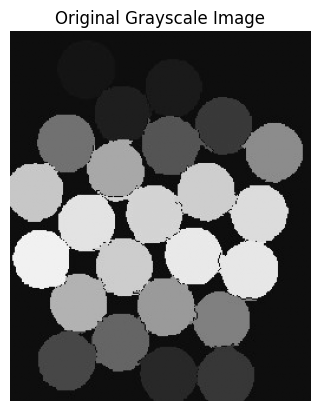

In [4]:
# Load and Preprocess Image

# Load the image from file
base_path = r'C:\Users\danis\OneDrive\Documents\Repos\CV_PE2\Practicals\P3_\data'
fig3 = cv2.imread( rf"{base_path}\fig3.jpg", cv2.IMREAD_GRAYSCALE)  # Replace with the path to Fig 1

# Check if the image was loaded successfully
if fig3 is None:
    raise ValueError("Image not found or unable to load.")

# Display the original grayscale image
plt.imshow(fig3, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

# Enhance Contrast
Equalize the histogram of the image to enhance contrast.

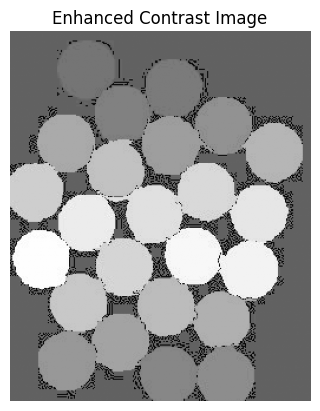

In [5]:
# Enhance Contrast

# Equalize the histogram for better contrast
fig3_eq = cv2.equalizeHist(fig3)

# Display the enhanced contrast image
plt.imshow(fig3_eq, cmap='gray')
plt.title('Enhanced Contrast Image')
plt.axis('off')
plt.show()

# Apply Gaussian Blur
Apply Gaussian Blur to the image to reduce noise.

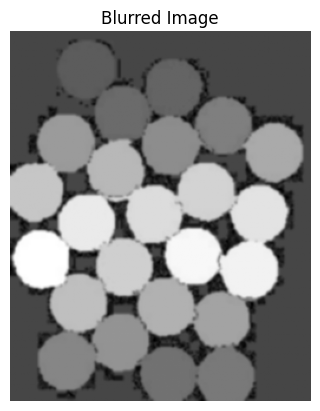

In [6]:
# Apply Gaussian Blur to the image to reduce noise
fig3_blurred = cv2.GaussianBlur(fig3_eq, (5, 5), 0)

# Display the blurred image
plt.imshow(fig3_blurred, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.show()

# Apply Adaptive Thresholding
Use adaptive thresholding to handle varying lighting conditions.

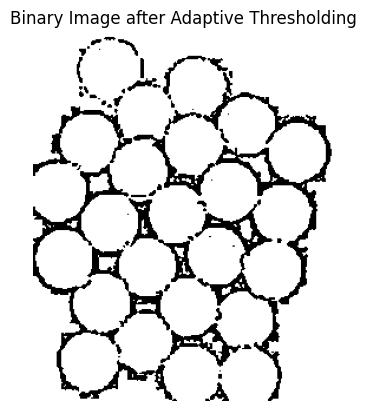

Ball count after thresholding: 21


In [7]:
# Apply Adaptive Thresholding to handle varying lighting
binary_fig3 = cv2.adaptiveThreshold(
    fig3_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Display the binary image after adaptive thresholding
plt.imshow(binary_fig3, cmap='gray')
plt.title('Binary Image after Adaptive Thresholding')
plt.axis('off')
plt.show()

# Count balls after thresholding
binary_ball_count = count_balls(binary_fig3)
print(f"Ball count after thresholding: {binary_ball_count}")

# Count Balls After Thresholding
Count the number of balls in the binary image after thresholding.

In [8]:
# Count balls after thresholding
binary_ball_count = count_balls(binary_fig3)
print(f"Ball count after thresholding: {binary_ball_count}")

Ball count after thresholding: 21


# Apply Erosion
Apply erosion to the binary image to separate balls that are too close.

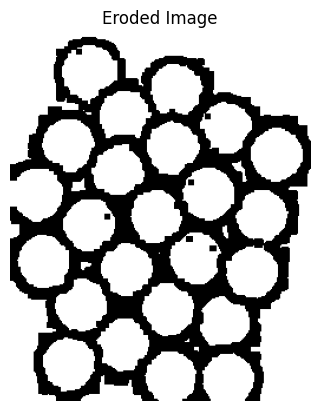

Ball count after erosion: 38


In [35]:
# Apply Erosion

# Define the kernel for erosion
kernel = np.ones((2, 2), np.uint8)

# Apply erosion to the binary image
eroded_fig3 = cv2.erode(binary_fig3, kernel, iterations=4)

# Display the eroded image
plt.imshow(eroded_fig3, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')
plt.show()

# Count balls after erosion
eroded_ball_count = count_balls(eroded_fig3)
print(f"Ball count after erosion: {eroded_ball_count}")

# Count Balls After Erosion
Count the number of balls in the binary image after erosion.

In [36]:
# Count balls after erosion
eroded_ball_count = count_balls(eroded_fig3)
print(f"Ball count after erosion: {eroded_ball_count}")

Ball count after erosion: 38


# Apply Dilation
Apply dilation to the binary image to restore the size of the balls.

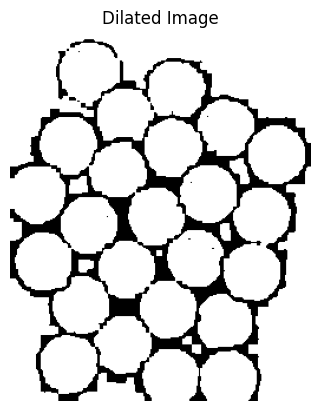

Ball count after dilation: 21


In [42]:
# Apply Dilation
kernel = np.ones((3, 3), np.uint8)

# Apply dilation to the eroded image to restore the size of the balls
dilated_fig3 = cv2.dilate(eroded_fig3, kernel, iterations=2)

# Display the dilated image
plt.imshow(dilated_fig3, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')
plt.show()

# Count balls after dilation
dilated_ball_count = count_balls(dilated_fig3)
print(f"Ball count after dilation: {dilated_ball_count}")

# Count Balls After Dilation
Count the number of balls in the binary image after dilation.

In [43]:
# Count balls after dilation
dilated_ball_count = count_balls(dilated_fig3)
print(f"Ball count after dilation: {dilated_ball_count}")

Ball count after dilation: 21


# Visualize the Output
Visualize the original image, binary image, and the final labeled image with detected balls.

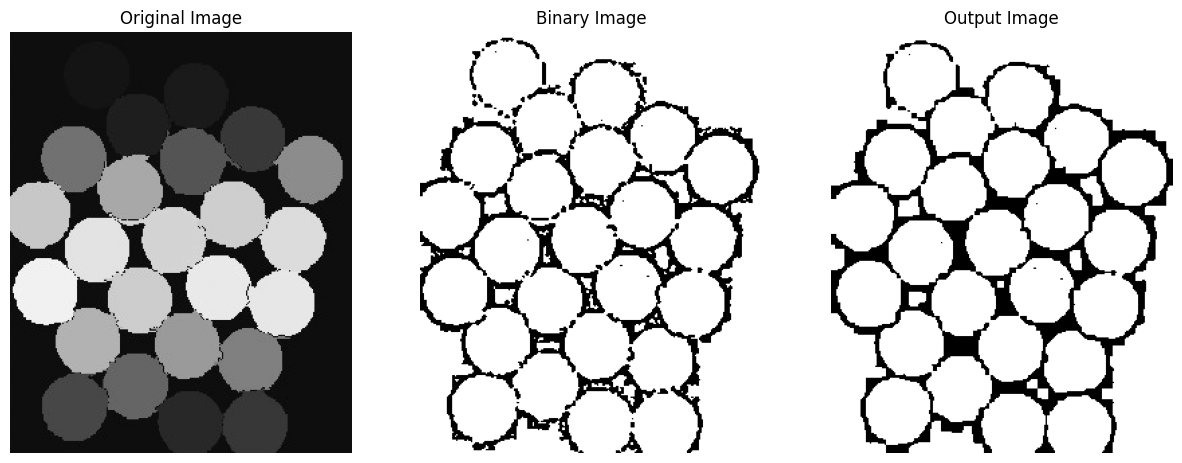

In [44]:
# Visualize the Output

# Function to display multiple images
def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    num_images = len(images)
    rows = (num_images // 3) + (num_images % 3 != 0)  # Dynamic rows calculation
    cols = 3  # 3 columns per row
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray' if len(images[i].shape) == 2 else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Display the original, binary, and final labeled images
display_images(
    [fig3, binary_fig3, dilated_fig3],
    ['Original Image', 'Binary Image', 'Output Image']
)